In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score


In [3]:
dataset = pd.read_csv("Advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
X = dataset[['TV','Radio','Newspaper']].values
y = dataset['Sales'].values

In [5]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [6]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
degrees = range(1, 10)
mse_test, bic_values, cv_errors = [], [], []

n_train = len(y_train)

In [9]:
# --- Boucle sur les degrés ---
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # 🔹 MSE sur test
    y_test_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_test_pred)
    mse_test.append(mse)
    
    # 🔹 BIC
    k = X_train_poly.shape[1]
    y_train_pred = model.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_train_pred)
    bic = n_train * np.log(mse_train) + k * np.log(n_train)
    bic_values.append(bic)
    
    # 🔹 Validation croisée
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

In [10]:
# --- Sélection des meilleurs degrés ---
best_mse_deg = degrees[np.argmin(mse_test)]
best_bic_deg = degrees[np.argmin(bic_values)]
best_cv_deg = degrees[np.argmin(cv_errors)]

In [11]:
print(f"Degré optimal selon MSE (test) : {best_mse_deg}")
print(f"Degré optimal selon BIC : {best_bic_deg}")
print(f"Degré optimal selon Validation Croisée : {best_cv_deg}")


Degré optimal selon MSE (test) : 2
Degré optimal selon BIC : 2
Degré optimal selon Validation Croisée : 2


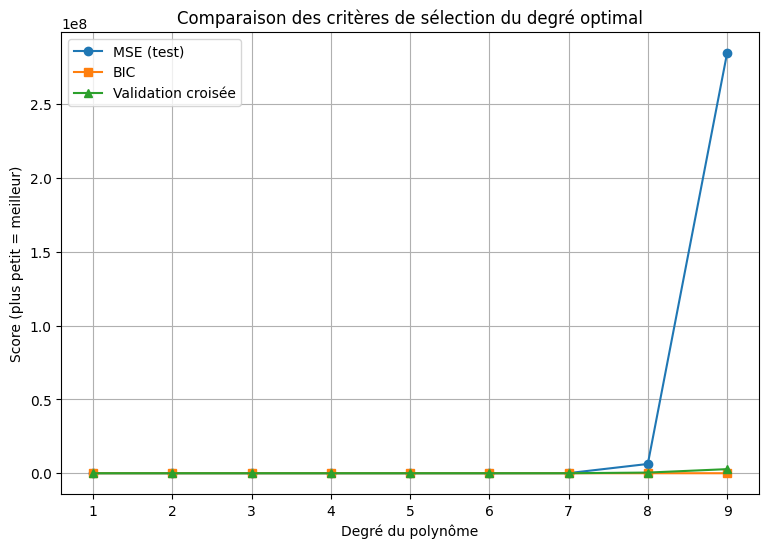

In [12]:

# --- Visualisation comparée ---
plt.figure(figsize=(9, 6))
plt.plot(degrees, mse_test, 'o-', label='MSE (test)')
plt.plot(degrees, bic_values, 's-', label='BIC')
plt.plot(degrees, cv_errors, '^-', label='Validation croisée')
plt.xlabel("Degré du polynôme")
plt.ylabel("Score (plus petit = meilleur)")
plt.title("Comparaison des critères de sélection du degré optimal")
plt.legend()
plt.grid(True)
plt.show()

### Degré 9 : À ÉVITER ABSOLUMENT (surapprentissage massif)
### Degrés 1-8 : Tous acceptables selon ce graphique ✓

In [13]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [14]:
# --- 1. Normalisation des Features ---
def normalize_features(X):
    """Normalise les features (Moyenne = 0, Écart-type = 1)."""
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1 # Protection contre la division par zéro
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_train_norm, mu, sigma = normalize_features(X_train)

In [15]:
# --- 2. Transformation Polynomiale (Degré 2 pour 3 features) ---
def feature_poly(X_norm):
    """
    Crée les termes polynomiaux de degré 2 pour 3 features:
    [X1, X2, X3, X1^2, X2^2, X3^2, X1*X2, X1*X3, X2*X3, 1 (biais)]
    """
    X1, X2, X3 = X_norm[:, 0:1], X_norm[:, 1:2], X_norm[:, 2:3]
    
    # Caractéristiques polynominales de degré 2
    poly_terms = np.hstack((
        X1**2, X2**2, X3**2,          # Carrés
        X1 * X2, X1 * X3, X2 * X3     # Interactions
    ))
    
    # Combinaison des termes originaux et polynomiaux
    X_poly = np.hstack((X_norm, poly_terms))
    
    # Ajout du terme de biais (colonne de 1)
    X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1)))) 
    return X_poly

X_poly_train = feature_poly(X_train_norm)
n_features = X_poly_train.shape[1]
theta = np.random.randn(n_features, 1) # Initialisation des 10 paramètres (10, 1)

In [16]:
def model(X, theta):
    """Calcule la prédiction H(X) = X * theta."""
    return X.dot(theta)

def cost_function(X, y, theta):
    """Calcule J(theta) (Erreur Quadratique Moyenne - MSE divisée par 2)."""
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def cost_function_reg(X, y, theta, lambda_=0):
    """
    Calcule J(theta) avec régularisation L2 (Ridge)
    Erreur Quadratique Moyenne (MSE/2) + pénalisation sur les poids.
    """
    m = len(y)
    predictions = model(X, theta)
    error = predictions - y
    
    # Coût sans régularisation
    J = (1 / (2 * m)) * np.sum(error ** 2)
    
    # Ajout de la régularisation L2 (on ignore theta[0] = biais)
    J += (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    
    return J


def grad(X, y, theta):
    """Calcule le Gradient de la fonction de coût."""
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    """Algorithme d'optimisation par Descente de Gradient."""
    cost_history = []
    
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # Mise à jour de theta
        cost_history.append(cost_function(X, y, theta))
        
    return theta, cost_history

In [ ]:
# --- Entraînement ---
learning_rate = 0.01 
n_iterations = 20000 

theta_initial = theta.copy()
cost_initial = cost_function(X_poly_train, y_train, theta_initial)

theta_final, cost_history = gradient_descent(X_poly_train, y_train, theta, learning_rate, n_iterations)
cost_final = cost_function(X_poly_train, y_train, theta_final)

In [18]:
# --- Évaluation sur l'ensemble de test ---
# 1. Normaliser X_test avec le mu et sigma de l'ensemble d'entraînement
X_test_norm = (X_test - mu) / sigma

# 2. Transformer X_test en features polynomiales
X_poly_test = feature_poly(X_test_norm)

# 3. Prédictions
y_pred_test = model(X_poly_test, theta_final)

# Calcul du R² pour l'évaluation finale
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred_test)**2)
r2_final = 1 - (ss_residual / ss_total)

Nombre de features (y compris le biais) : 10
--------------------------------------------------
Coût initial (avant entraînement) : 106.3155
Coût final (après 20000 itérations) : 0.9539
Performance (R²) sur l'ensemble de Test : 0.9533
--------------------------------------------------
Coefficients finals (Theta) :
[ 4.48371939  1.50531882  0.06329735 -0.74933164  0.31545407  0.03504415
  0.51983801 -0.04357516  0.04927631 15.68316222]


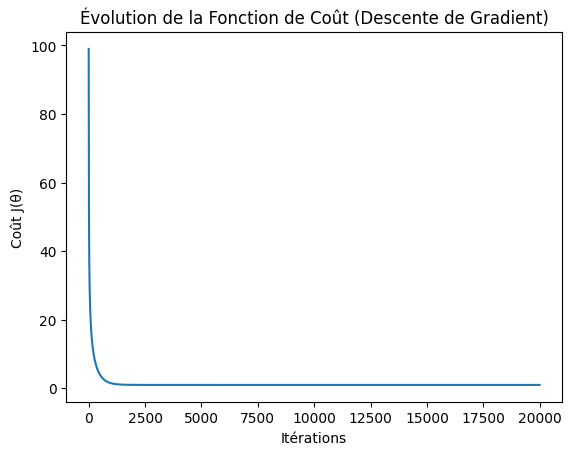

In [19]:
# --- Affichage des Résultats ---

print(f"Nombre de features (y compris le biais) : {n_features}")
print("-" * 50)
print(f"Coût initial (avant entraînement) : {cost_initial:.4f}")
print(f"Coût final (après {n_iterations} itérations) : {cost_final:.4f}")
print(f"Performance (R²) sur l'ensemble de Test : {r2_final:.4f}")
print("-" * 50)
print("Coefficients finals (Theta) :")
print(theta_final.flatten())

# Affichage de l'historique du coût pour vérifier la convergence
plt.figure()
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Itérations")
plt.ylabel("Coût J(θ)")
plt.title("Évolution de la Fonction de Coût (Descente de Gradient)")
plt.show()